In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tabulate import tabulate
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from PIL import Image
import cv2

In [2]:
# Load the MNIST dataset
mnist = tf.keras.datasets.mnist

# Split into training and testing data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the data
x_train, x_test = x_train / 255.0, x_test / 255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Image but as an array:[[0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.        

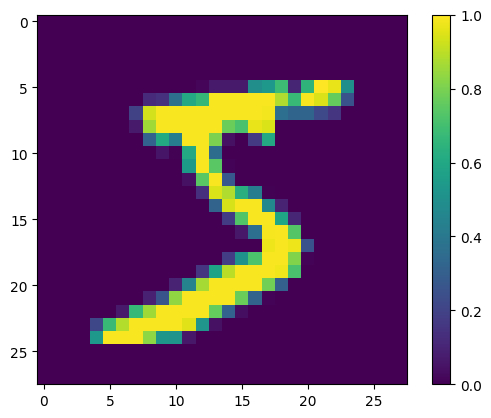

In [4]:
# Let us try any index
index=0

# Set the number of characters per row when printing
np.set_printoptions(linewidth=320)


# print the label and image respectively
print(f'Image but as an array:{x_train[index]}')




# View the image
plt.imshow(x_train[index])
plt.colorbar()
plt.show()

In [15]:
# Defining the model
model = tf.keras.models.Sequential([

          tf.keras.Input(shape=(28,28,1)),
          tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
          tf.keras.layers.MaxPooling2D(2,2),
          tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
          tf.keras.layers.MaxPooling2D(2,2),
          tf.keras.layers.Flatten(),
          tf.keras.layers.Dense(128, activation=tf.nn.relu),
          tf.keras.layers.Dense(10, activation=tf.nn.softmax)



])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 11, 11, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 243,786 (952.29 KB)

 Trainable params: 243,786 (952.29 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):
      if(logs.get('accuracy')>0.99):
        print("\nReached 99% accuracy so cancelling training!")
        self.model.stop_training = True

In [17]:
callbacks = myCallback()

model.compile(optimizer= tf.optimizers.Adam(),
         loss = 'sparse_categorical_crossentropy'   ,
              metrics=['accuracy']
              )

# Train the model with the validation data
history = model.fit(
    x_train, y_train,
    epochs=100,

    callbacks=[callbacks]  # Custom callback for stopping early
)



Epoch 1/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 163s 49ms/step - accuracy: 0.9184 - loss: 0.2691
Epoch 2/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 93s 50ms/step - accuracy: 0.9871 - loss: 0.0409
Epoch 3/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.9916 - loss: 0.0258
Reached 99% accuracy so cancelling training!
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 142s 50ms/step - accuracy: 0.9916 - loss: 0.0258


In [18]:
# Example image path
img_path = 'num.png'  # Replace with your image path

def process_fashion_image(image_path):
    # Load and convert the image to grayscale
    image = Image.open(image_path).convert('L')

    # Resize the image to 28x28 pixels
    image = image.resize((28, 28))

    # Convert the image to a NumPy array
    image_array = np.array(image)

    # Normalize the pixel values to the range [0, 1]
    image_array = image_array / 255.0

    # Ensure the array is in the shape expected by TensorFlow (batch size, height, width, channels)
    image_array = np.expand_dims(image_array, axis=0)  # Add batch dimension
    image_array = np.expand_dims(image_array, axis=-1)  # Add channel dimension

    # Print the shape of the array to debug
    print("Shape of input array:", image_array.shape)

    # Print the normalized image array in grid format
    print("Normalized Image Array:")
    print(image_array.squeeze())  # Remove batch and channel dimensions for display

    # Display the image
    plt.imshow(image_array.squeeze(), cmap='gray')
    plt.title('Processed Fashion Image')
    plt.axis('off')
    plt.show()

    # Convert the NumPy array to a TensorFlow tensor
    image_tensor = tf.convert_to_tensor(image_array, dtype=tf.float32)

    return image_tensor

Shape of input array: (1, 28, 28, 1)
Normalized Image Array:
[[0.95294118 0.94901961 0.95294118 0.95294118 0.95294118 0.95294118 0.94901961 0.95686275 0.98823529 0.93333333 0.74901961 0.55686275 0.43137255 0.39215686 0.42745098 0.54901961 0.74117647 0.93333333 0.98823529 0.95686275 0.94901961 0.94901961 0.94901961 0.94901961 0.94901961 0.94901961 0.95294118 0.94901961]
 [0.94901961 0.95294118 0.94901961 0.94901961 0.94901961 0.94901961 0.96862745 0.94901961 0.59607843 0.2        0.02352941 0.         0.         0.         0.         0.         0.01960784 0.19607843 0.60392157 0.96078431 0.96470588 0.94901961 0.95294118 0.95294118 0.95294118 0.95294118 0.94901961 0.95294118]
 [0.95294118 0.94901961 0.95294118 0.95294118 0.94901961 0.96862745 0.89019608 0.28627451 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.34509804 0.93333333 0.96078431 0.94901961 0.94901961 0.94901961 0.94901961 0.95294118 0.94901961]
 [0.95

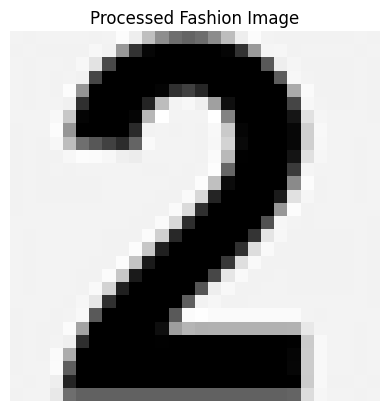

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
The predicted class is: [2]


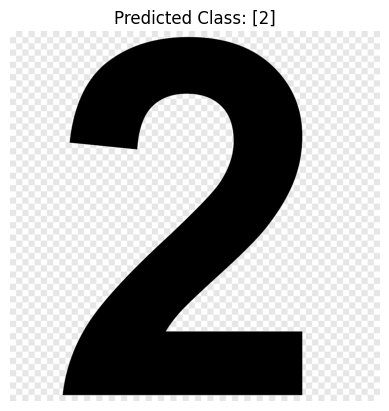

In [23]:


# Example usage
image_tensor = process_fashion_image('num.png')



def invert_image(image_array):
    """
    Inverts the normalized image array.

    Parameters:
    - image_array (np.ndarray): The normalized image array with values in the range [0, 1].

    Returns:
    - np.ndarray: The inverted image array.
    """
    # Ensure the image array is a NumPy array
    image_array = np.array(image_array)

    # Invert the image by subtracting from 1
    inverted_image = 1.0 - image_array

    return inverted_image

image_tensor = invert_image(image_tensor)
# Make prediction
predictions = model.predict(image_tensor)
predicted_class = np.argmax(predictions, axis=1)

# Display the result
print(f'The predicted class is: {predicted_class}')

# Display the image
img = Image.open('num.png')
plt.imshow(img, cmap='gray')
plt.title(f'Predicted Class: {predicted_class}')
plt.axis('off')
plt.show()
